# **PENS AND PRINTERS - ANALYSIS OF SALE STRATEGIES**

Pens and Printers was founded in 1984 and provides high quality office products to large
organizations. We are a trusted provider of everything from pens and notebooks to desk
chairs and monitors. We don’t produce our own products but sell those made by other
companies.
We have built long lasting relationships with our customers and they trust us to provide them
with the best products for them. As the way in which consumers buy products is changing,
our sales tactics have to change too. Launching a new product line is expensive and we need
to make sure we are using the best techniques to sell the new product effectively. The best
approach may vary for each new product so we need to learn quickly what works and what
doesn’t.

**New Product Sales Methods**


Six weeks ago we launched a new line of office stationery. Despite the world becoming
increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused
on tools for brainstorming. We have tested three different sales strategies for this, targeted
email and phone calls, as well as combining the two.
Email: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required very little work for the team.
Call: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around thirty minutes per customer.
Email and call: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around ten
minutes per customer.

sales representitve needs to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.


In [449]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kruskal

In [450]:
#reading csv
sales= pd.read_csv("product_sales.csv")

In [451]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [452]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [453]:
# many null values present

In [454]:
sales.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [455]:

# how can someone have 63 years of relation with company if company was founded in 1984

In [456]:
# replacing most repeating values with years_as_customer > 39 (2023-1984 = 39)

In [457]:
mod_rev=sales.years_as_customer.mode()[0]

In [458]:
sales.revenue.loc[sales.years_as_customer > 39]=mod_rev

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_14956\1550379816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales.revenue.loc[sales.years_as_customer > 39]=mod_rev


In [459]:
sales.isnull().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [460]:
sales.sales_method.value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [461]:
# data inconsistency founded

In [462]:
sales.state.nunique()

50

In [463]:
# converting values to lowercase

In [464]:
sales['sales_method']=sales['sales_method'].str.lower()

In [465]:
# replacing inconsistency

In [466]:
sales.replace({"em + call":"email + call"},inplace=True)

In [467]:
sales.sales_method.value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

In [468]:
# count is very different

In [469]:
# filling nulls

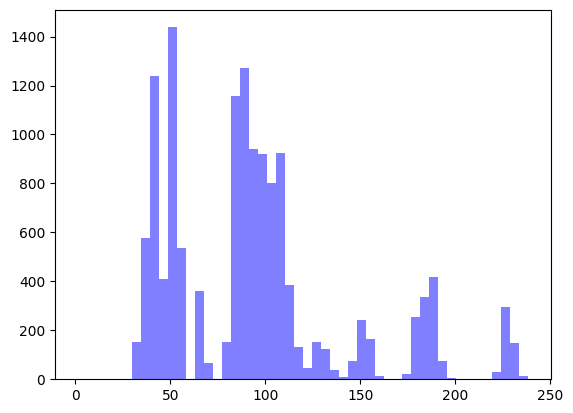

In [470]:
plt.hist(sales.revenue, bins=50, color='blue', alpha=0.5)
plt.show()

In [471]:
# histogram is not normally distributed, so we have to fill with medians

In [472]:
# Calculate the median revenue for each sales method
median_revenue_by_method = sales.groupby('sales_method')['revenue'].transform('median')

# Fill missing values with the respective median value for each sales method
sales['revenue'] = sales['revenue'].fillna(median_revenue_by_method)


## Data Validation

The dataset initially consisted of 15000 rows and 8 columns, which were thoroughly validated and cleaned against specific criteria.

- week: The "week" column, which contained numerical values ranging from 1 to 6, **did not require any cleaning**.
- sales_method: The "sales_method" column initially had **five categories instead of three**. To address this, the values were converted to lowercase and "em + call" was replaced with "email + call". 
- customer_id: The "customer_id" column contained no duplicates and was of object type, and thus **did not require any cleaning**.
- nb_sold: Similarly, the "nb_sold" column had numerical data type and **did not require any cleaning**.
- revenue: The "revenue" column had float type, but was missing 1074 values, necessitating cleaning. The **missing values were filled** with the average value of revenue.
- years_as_customer: The "years_as_customer" column had numerical data type, but two values were found to be **greater than 39**, which is impossible as the company was founded in 1984. These values were replaced with the mode value.. 
- nb_site_visits: The "nb_site_visits" column contained numerical data type and had no missing values, **hence no cleaning was require**d.
- state: Finally, the "state" column contained 50 unique values, with no duplicates and was of object data type, requiring no further cleaning.
Validation completed, dataset contains **15000 rows and 8 columns** after validation.

# **EXPLORATORY ANALYSIS**

## How many customers were there for each approach?

**Customers and sales methods - Bar chart**

Based on the bar chart, it is evident that email was the most popular sales method, with over 7000 customers,followed by calls, with about 5000 customers using this method.And by combination of both email and calls was used by around 2500 customers.

Even though these findings suggest that email may be a more effective sales method for reaching customers than calls alone, we cant confirm it without further analysis

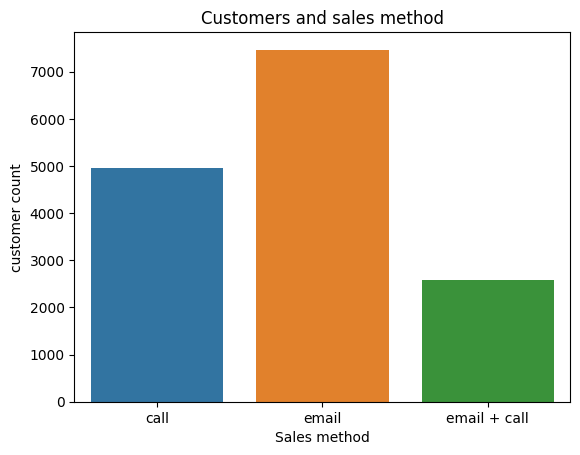

In [473]:
sales_approach=sales.groupby('sales_method')['customer_id'].count().reset_index()
sns.barplot(x=sales_approach.sales_method,y=sales_approach.customer_id)
plt.title('Customers and sales method')
plt.xlabel('Sales method')
plt.ylabel('customer count')
plt.show()

**Customers proportions by sales method - Pie chart**

According to the pie chart, approximately half of the customers weere using email as their sales method, while about one-third were using calls.

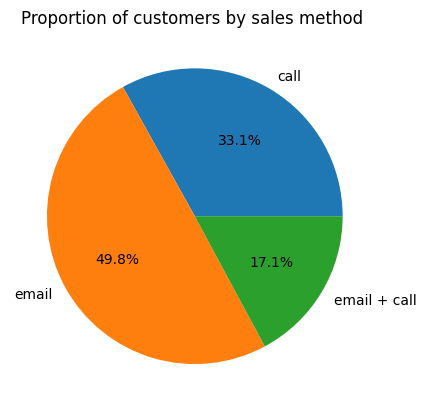

In [474]:
revenue_by_method = sales.groupby('sales_method')['customer_id'].count().reset_index()
plt.pie(revenue_by_method.customer_id, labels=revenue_by_method.sales_method, autopct='%1.1f%%')
plt.title("Proportion of customers by sales method ")
plt.show()

##  What does the spread of the revenue look like overall? And for each method?

In [475]:
# let's check revenue distribution using histogram and boxplot

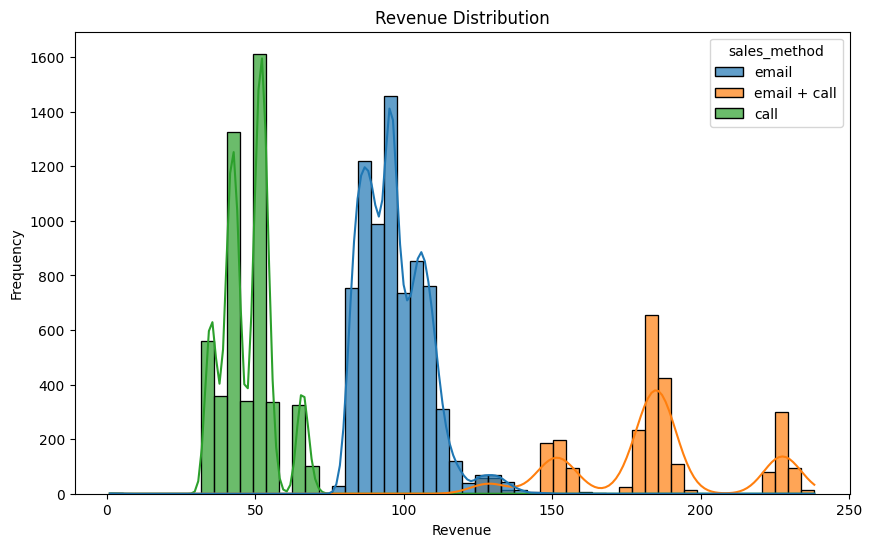

In [476]:
plt.figure(figsize=[10,6])
sns.histplot(data=sales, x='revenue', alpha=0.7, kde=True, hue=sales.sales_method)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


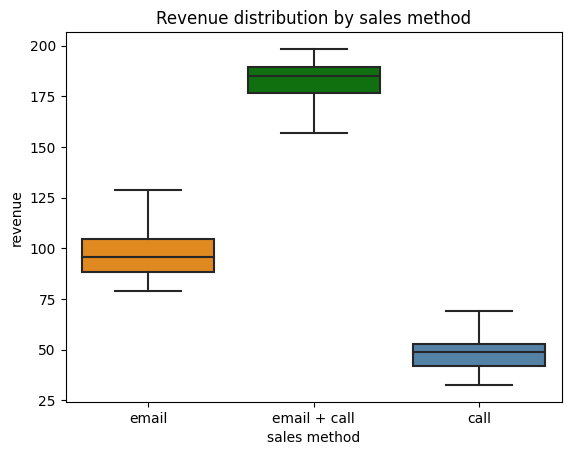

In [477]:
sns.boxplot(x=sales.sales_method,y=sales.revenue,sym='',palette=['darkorange','green','steelblue'])
plt.title("Revenue distribution by sales method")
plt.xlabel("sales method")
plt.show()

After analyzing the histogram plot,it seems like each sales method is targetting on each price category it can be observed that the revenue data is right skewed, indicating that there are a few high revenue values that are driving the overall distribution to the right. The majority of purchases were made at around `$100 and $50`.

An interesting observation from the revenue data with respect to sales methods is that although the count of customers using the 'email + call' sales method was low,  they tended to purchase in wide price range, mostly expensive purchases compared to other methods.

This highlights the distinct characteristics associated with different sales methods and the range of purchases made by customers using them. Additionally, the data suggests that email sales methods the purchases are more around `$100`, whereas call sales methods have the least revenue range.

## hypothesis testing

#### null hypothesis is there is no relation between the sales methods and revenue

In [478]:
# I tried kruskal h test because the data is not normally distributed
# have high variance

In [479]:

email=sales.revenue[sales.sales_method=='email'].tolist()
email_call=sales.revenue[sales.sales_method=='email + call'].tolist()
call=sales.revenue[sales.sales_method=='call'].tolist()


f_stat, p_value = stats.kruskal(email,email_call,call)


print("F-statistic:",f_stat)
print("P-value:",p_value)
if p_value< 0.15:
    print("""Null hypothesis rejected, there is atleast one sales 
method wich impacts the revenue """)
else:
    print("""Null hypothesis accepted, there is atleast no sales 
method wich impacts the revenue """)

F-statistic: 12519.958323788647
P-value: 0.0
Null hypothesis rejected, there is atleast one sales 
method wich impacts the revenue 


In [480]:
#F- stastistic show there is huge difference between the sales_method revenue generation

**Total revenue by sales method- Bar chart**

Based on the data data visualization, it is evident that the email sales strategy generated the most revenue, with over `7.2M$`,Following by "email + call" with `4.4M` and least revenue of `2.4M$` with call strategies.

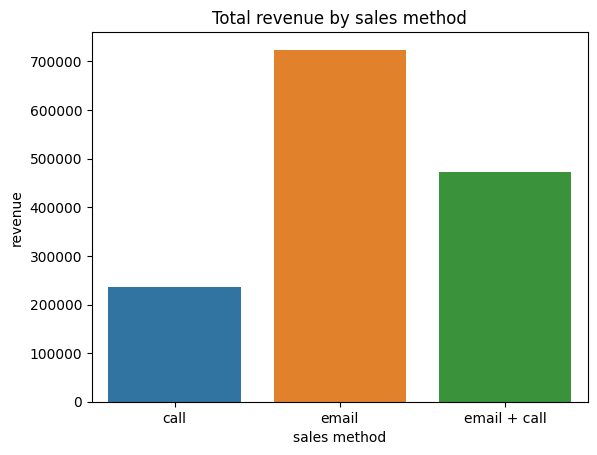

In [481]:
revenue_by_method=sales.groupby('sales_method')['revenue'].sum().reset_index()
sns.barplot(y=revenue_by_method.revenue,x=revenue_by_method.sales_method)
plt.title("Total revenue by sales method")
plt.xlabel("sales method")
plt.show()

**Average revenue by sales method- Bar chart**

The data indicates that the email and call sales method generated the highest average revenue. Despite being used by a smaller number of customers, this method resulted in purchases of high-value products.

In [482]:
sales_cust = sales.groupby('sales_method').agg({'customer_id': 'count', 'revenue': 'sum'})
sales_cust['avg_rev']=sales_cust.revenue/sales_cust.customer_id
sales_cust

,customer_id,revenue,avg_rev
sales_method,,,
call,4962,236388.45,47.639752
email,7466,724214.41,97.001662
email + call,2572,472730.95,183.798970


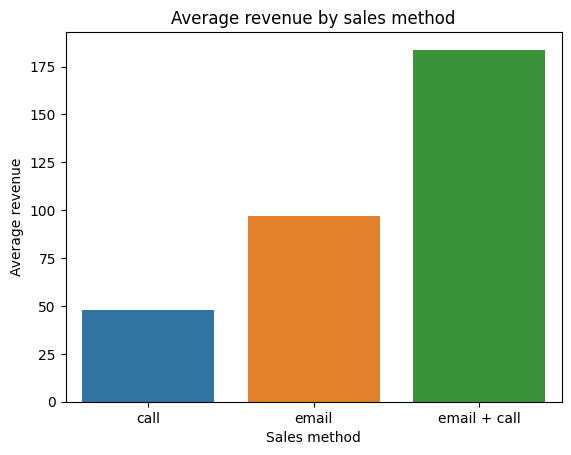

In [483]:
sns.barplot(x=sales_cust.index,y=sales_cust.avg_rev)
plt.title("Average revenue by sales method")
plt.xlabel("Sales method")
plt.ylabel("Average revenue")
plt.show()


In [484]:
call_sales = sales[sales['sales_method'] == 'call']
call_revenue_quantiles= call_sales['revenue'].quantile(0.95)
email_sales = sales[sales['sales_method'] == 'email']
email_revenue_quantiles = email_sales['revenue'].quantile(0.95)

In [485]:
labels= ['low_value', 'Medium_value', 'high_value']
bins=[-float('inf'),call_revenue_quantiles,email_revenue_quantiles,float('inf')]
sales['revenue_range'] = pd.cut(sales['revenue'],bins=bins, labels=labels)


In [486]:
sales.groupby('revenue_range')['sales_method'].value_counts().reset_index(name='count')

,revenue_range,sales_method,count
0,low_value,call,4713
1,low_value,email,1
2,Medium_value,email,7091
3,Medium_value,call,249
4,high_value,email + call,2572
5,high_value,email,374


In [487]:
# finding correlations

C:\Users\THE_DE_V_IL\AppData\Local\Temp\ipykernel_14956\2515521611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sales.corr(), cmap='coolwarm', annot=True)


<AxesSubplot: >

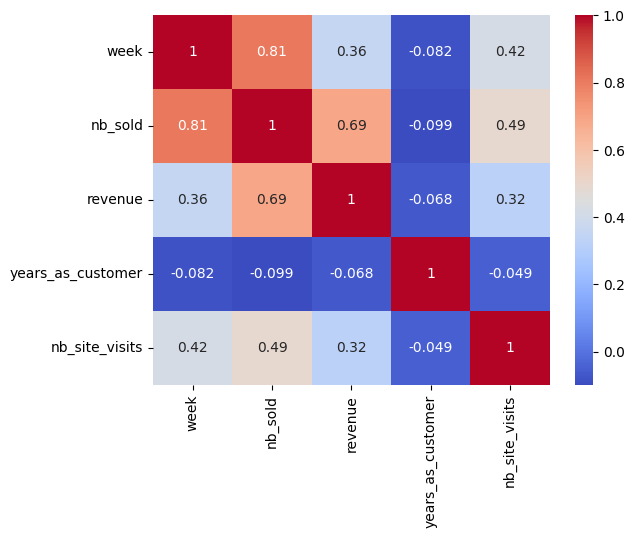

In [488]:
sns.heatmap(sales.corr(), cmap='coolwarm', annot=True)

In [2]:
# unit sold has highest correlation with week! 0.81
# may be there is discount sale on certain weeks, since we dont have the discount or sales price columns we cant conclude that, also we dont know the dates, so we cannot conclude if it was seasonal sale.

In [490]:
# week and unit sold has the correlation

## Was there any difference in revenue over time for each of the methods?

**Revenue by week - Stacked bar chart**

The analysis becomes more complex from this point onwards. While observing the total revenue generated over the week, we notice that there is no consistent trend, But when we analyze the revenue generated by sales method, we find an interesting trend. The majority of revenue generated through email occurs in the first week, and then there is a steady decline in the subsequent weeks. And inrease in the multile channel strategy.

For clarification, I have created a line plot that clearly demonstrates the gradual decrease in revenue over time for each communication method.

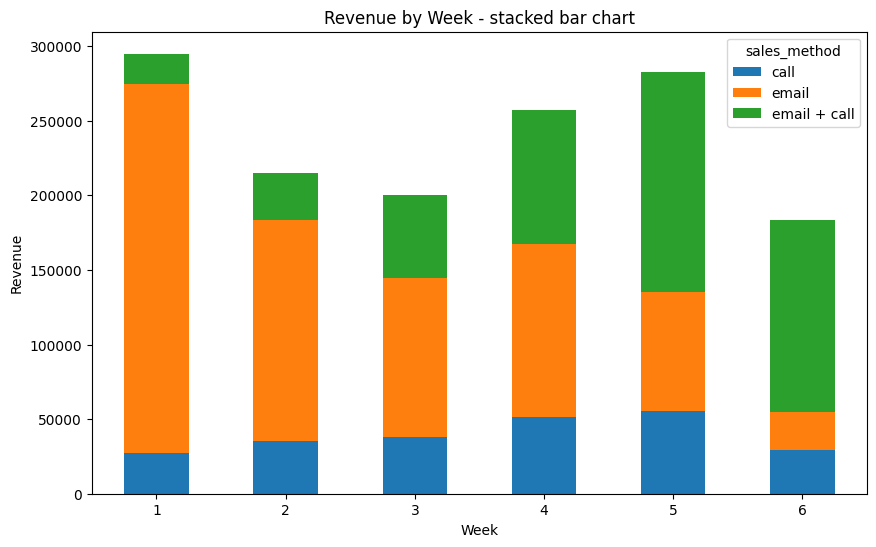

In [491]:
fig, ax = plt.subplots(figsize=[10, 6])
revenue_by_week = sales.groupby(['week','sales_method'])['revenue'].sum().unstack()
revenue_by_week.plot(kind='bar', stacked=True, ax=ax)
plt.title('Revenue by Week - stacked bar chart')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()


**Revenue by week - line plot**

Our further analysis has revealed a notable trend in the revenue generation by different communication methods. Specifically, while the revenue generated through email alone is declining significantly week by week, the revenue generated by email and call is increasing steadily.

Moreover, we have observed that the revenue generated through the call method has remained relatively consistent and has not shown significant changes over time.


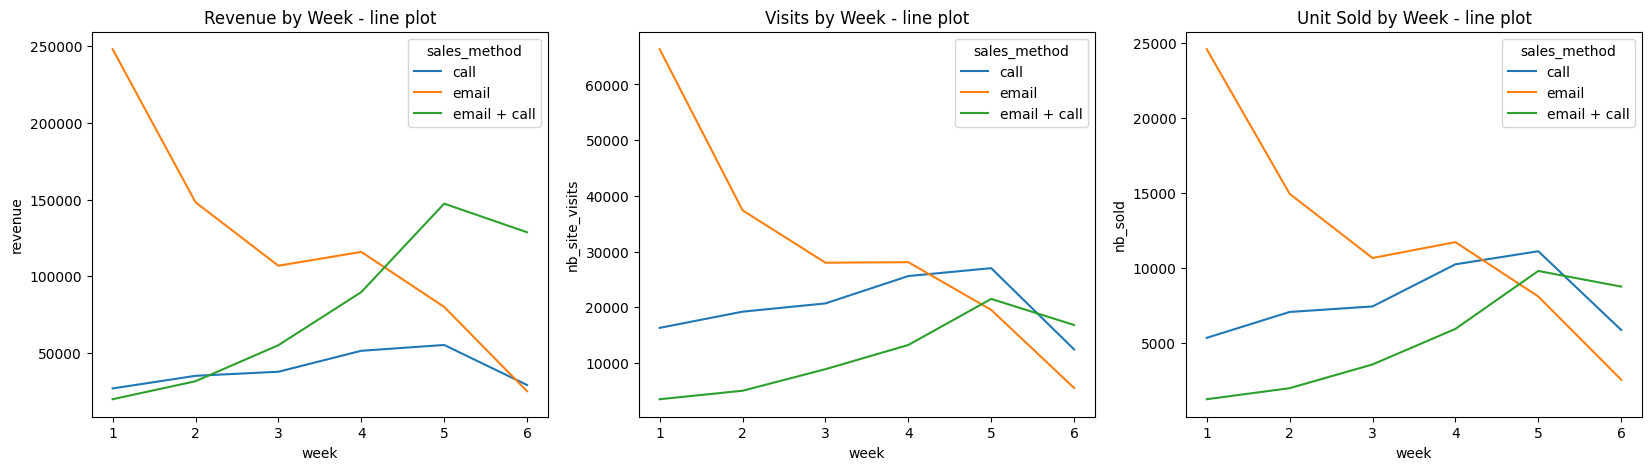

In [501]:
import matplotlib.pyplot as plt
import seaborn as sns

revenue_by_week_method = sales.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
visits_by_week_method = sales.groupby(['week', 'sales_method'])['nb_site_visits'].sum().reset_index()
units_by_week_method = sales.groupby(['week', 'sales_method'])['nb_sold'].sum().reset_index()

# create subplots and set the figure size
fig, axs = plt.subplots(ncols=3, figsize=(20,5))

# plot the line plots in the subplots
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_by_week_method, ax=axs[0])
sns.lineplot(x='week', y='nb_site_visits', hue='sales_method', data=visits_by_week_method, ax=axs[1])
sns.lineplot(x='week', y='nb_sold', hue='sales_method', data=units_by_week_method, ax=axs[2])

# set the titles for the subplots
axs[0].set_title('Revenue by Week - line plot')
axs[1].set_title('Visits by Week - line plot')
axs[2].set_title('Unit Sold by Week - line plot')

# display the subplots
plt.show()


site visits and unit sold over week has similar graphs This could mean that the more site visits a product receives, the higher the chance of selling more units. Alternatively, it could mean that the marketing efforts to increase site visits are effective, which in turn increases the number of unit sales. But They need make advertisments and offers again since the site visits are decreasing. 





In [494]:
# there is a drastic decrease in the site visits by week
# we should redesign website or give more offers included in the mail.

In [502]:
# lets check sales last 4 weeks only

In [503]:
weeks=[3,4,5,6]

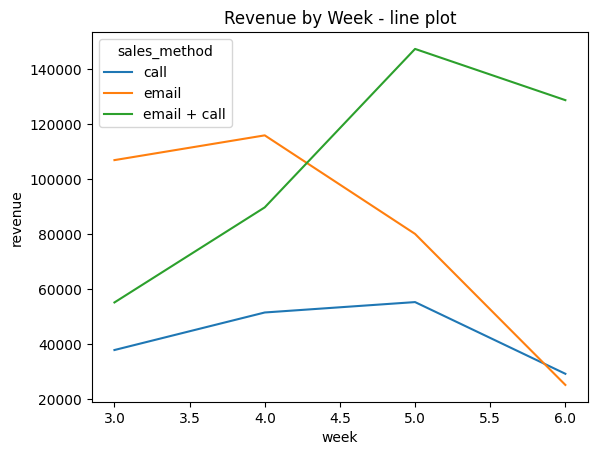

In [504]:
revenue_by_lastweeks_method = sales[sales.week.isin(weeks)].groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
sns.lineplot(x='week', y='revenue', hue='sales_method', data=revenue_by_lastweeks_method)
plt.title('Revenue by Week - line plot')
plt.show()

You can clearly see that for last 4 weeks the revenue is increasing

# **Geographic analysis**

In [ ]:
revenue_by_state=sales.groupby('state')['revenue'].sum().reset_index().sort_values(by='revenue',ascending = False)

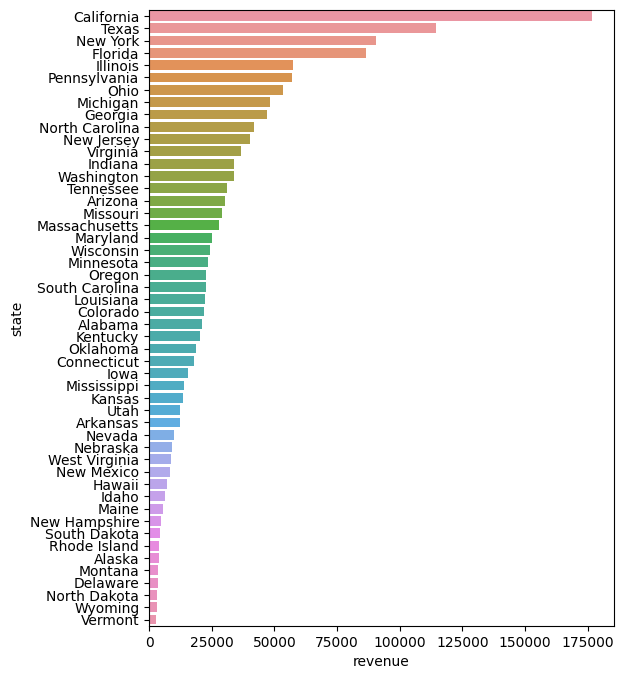

In [ ]:
plt.figure(figsize=[6,8])
sns.barplot(y=revenue_by_state.state,x=revenue_by_state.revenue)
plt.show()

In [ ]:
# california has highest sales 
# North dakota has least

## **Customer analysis**

In [ ]:
# lets check our top 2000 customers


In [ ]:
top_customers=sales.sort_values(by='revenue',ascending=False)[0:2000]
top_customers

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,revenue_range
3490,6,email + call,21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36,North Carolina,high_value
12006,6,email + call,5a34f271-29fd-4777-a9d6-ffd5076f4f55,16,238.23,3,33,New York,high_value
735,6,email + call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29,California,high_value
6792,6,email + call,535ddeb0-ca5d-40f2-a0e0-733c864fe686,16,236.75,2,30,Florida,high_value
4238,6,email + call,68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32,North Carolina,high_value
...,...,...,...,...,...,...,...,...,...
3211,3,email + call,7e204c45-3388-4c75-8fee-af14a47e4100,10,156.30,0,23,New Jersey,high_value
547,3,email + call,4a91cb02-b3aa-4b17-a020-56a933d2e373,10,156.22,1,23,California,high_value
5824,3,email + call,c2adac62-3332-44da-9df8-de2d99aff66e,10,156.18,0,23,Mississippi,high_value
3102,2,email + call,1e9f05f5-68d8-4709-a243-93d2f4f4ee38,10,156.16,0,23,Arkansas,high_value


In [ ]:
top_customers.sales_method.value_counts()

email + call    2000
Name: sales_method, dtype: int64

In [ ]:
# as you cam see our top 2000 customers only one uses email, rest uses combination method.

In [ ]:
# lets check where are they from
top_customers.state.value_counts()

California        241
Texas             155
Florida           121
New York          121
Illinois           80
Pennsylvania       78
Ohio               76
Michigan           66
Georgia            62
Washington         59
New Jersey         53
North Carolina     52
Virginia           52
Indiana            43
Minnesota          42
Tennessee          42
Arizona            40
Missouri           38
Massachusetts      36
Maryland           36
Wisconsin          36
Oregon             36
South Carolina     35
Alabama            33
Kentucky           33
Louisiana          30
Connecticut        28
Oklahoma           26
Colorado           25
Mississippi        22
Iowa               20
Arkansas           19
Utah               19
Kansas             17
Nebraska           16
Nevada             14
West Virginia      13
Hawaii             11
Idaho              10
New Mexico         10
Rhode Island        7
Maine               7
South Dakota        7
Wyoming             6
Vermont             6
Delaware  

Most of them are from california, texas and florida

In [ ]:
# lets check the how long they have been with us

<AxesSubplot: xlabel='years_as_customer', ylabel='Count'>

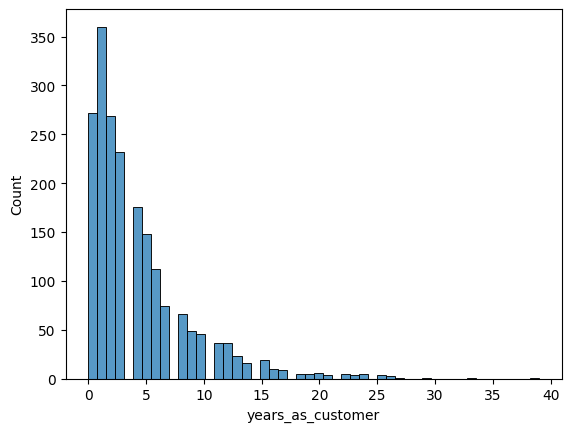

In [ ]:
sns.histplot(top_customers.years_as_customer)

In [ ]:
# Most of them are new, so it doesnt matter hw long they have been purchasing

<AxesSubplot: xlabel='nb_sold', ylabel='Count'>

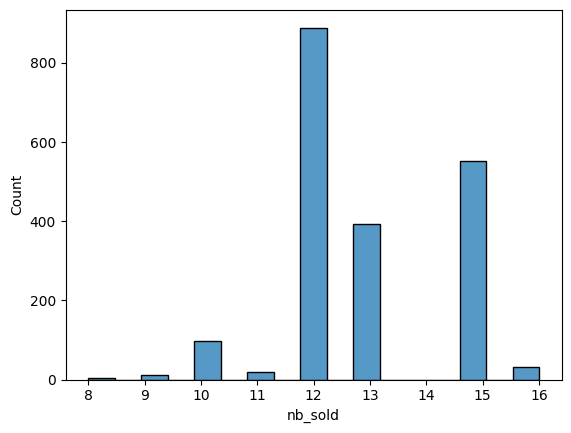

In [ ]:
sns.histplot(top_customers.nb_sold)

In [ ]:
# most of them are buying 12 quantities

# business metrics

- we analyzed the business metrics for Pens and Printers and found that the combination of email and call generates the highest average revenue by sales method. Moreover, this method is effective in increasing weekly revenue. Therefore, we recommend using this as a key metric for evaluating the sales performance.

- We also found that while email alone generates the highest revenue, it is crucial to note that most of the revenue is generated in the first week and decreases drastically afterward. Hence, we suggest adopting the 'email + call' method to sustain revenue growth over time.

- Furthermore, our analysis showed that customers using the email with call method tend to make purchases in higher values. Therefore, we propose using this as another key metric to evaluate customer behavior and preferences.


**Recommendations**

- The 'email and call' method can generate high-value purchases and reach a wide range of customers
- This method is more efficient than the call method, as it requires an average of only 10 minutes of call time and minimal effort from our team when sending the email
- Improving the email content can enhance the effectiveness of the 'email and call' method
- Following up with a call after sending the email can improve customer relationships and increase the likelihood of closing a deal
- Offering personalized deals to high-value customers can help prevent customer churn and increase loyalty
- Creating a feedback system in the email can provide valuable insights into customer preferences and needs
- Monitoring revenue over a longer period, such as monthly revenue, can help identify trends and inform necessary changes to the sales method.
- We could try to monitor customers with equal sample size lets say 1000 customers each for 3-4 months by each method, so we can get more accurate result.
- Create advertisements and offers to attract the customers to increase website visits, which will ultimately increase sales.
- Gather more details for the products, such as sales price, discounts, types of office stationary such as technology, suppies and furniture. so we would know the customer buying patterns